In [1]:
import pandas as pd
import matplotlib as mat
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

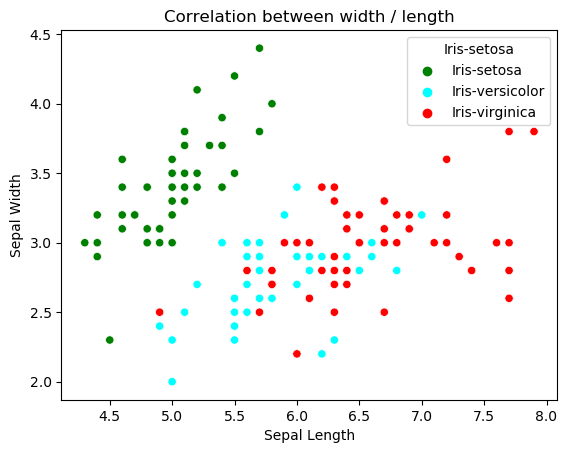

In [2]:
# sepal length / sepal width

iris = pd.read_csv("iris.csv")

sepal_length = iris.iloc[:, 0]
sepal_width = iris.iloc[:, 1]
petal_length = iris.iloc[:, 2]
petal_width = iris.iloc[:, 3]


iris_type = iris.iloc[:, 4] 
palette = {
    'Iris-setosa': 'green',
    'Iris-versicolor': 'cyan',
    'Iris-virginica': 'red',
}
          
sns.scatterplot(data=iris, x = sepal_length, y = sepal_width, hue = iris_type, palette = palette)

plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.title("Correlation between width / length")
#plt.colorbar(ticks = [0, 2, 4])
plt.show()

In [3]:
def plot_drawer(title, xlabel, ylabel, column1, column2):
    sns.scatterplot(data = iris, x = column1, y = column2, hue = iris_type, palette = palette)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

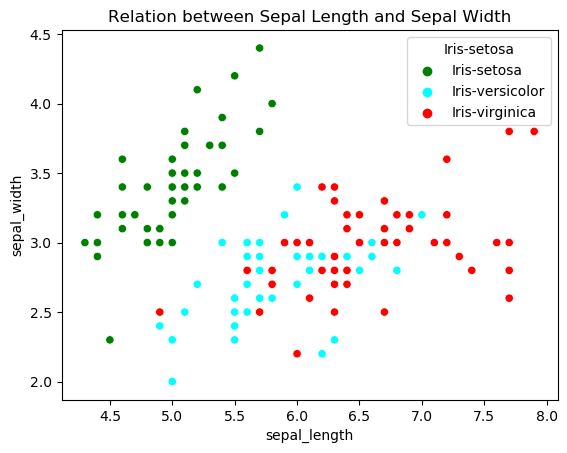

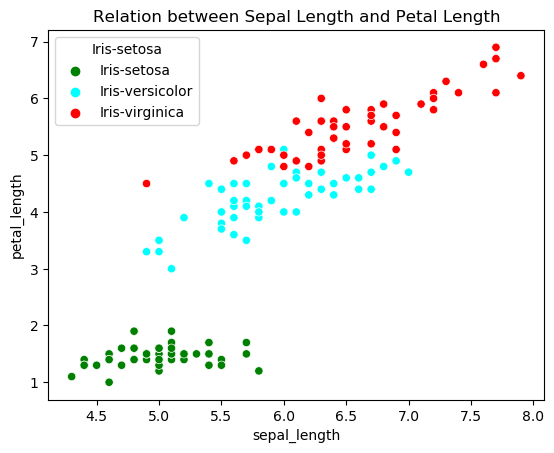

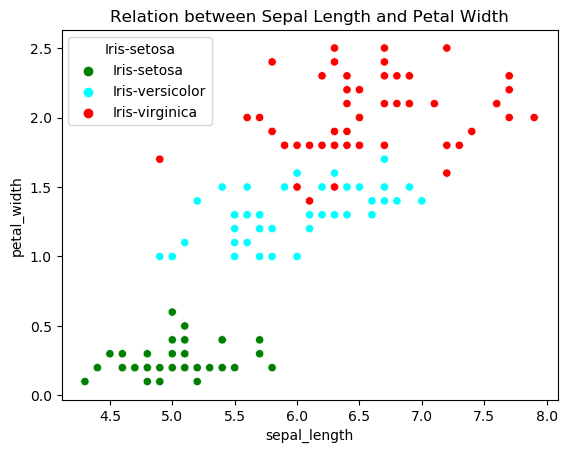

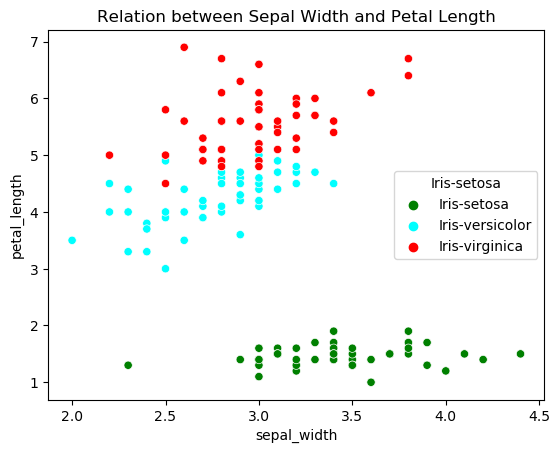

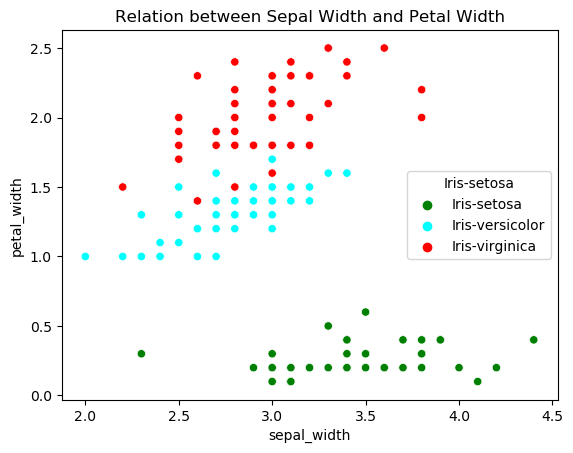

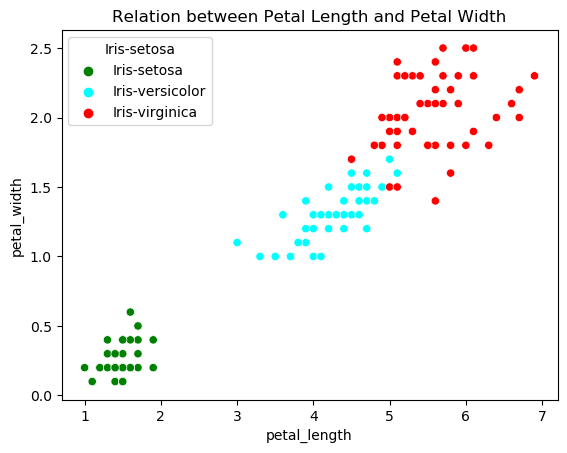

In [4]:
sepl_sepw = plot_drawer("Relation between Sepal Length and Sepal Width", "sepal_length", "sepal_width", sepal_length, sepal_width)
sepl_petl = plot_drawer("Relation between Sepal Length and Petal Length", "sepal_length", "petal_length", sepal_length, petal_length)
sepl_petw = plot_drawer("Relation between Sepal Length and Petal Width", "sepal_length", "petal_width", sepal_length, petal_width)
sepw_petl = plot_drawer("Relation between Sepal Width and Petal Length", "sepal_width", "petal_length", sepal_width, petal_length)
sepw_petw = plot_drawer("Relation between Sepal Width and Petal Width", "sepal_width", "petal_width", sepal_width, petal_width)
petl_petw = plot_drawer("Relation between Petal Length and Petal Width", "petal_length", "petal_width", petal_length, petal_width)

In [5]:
def plot(ax1, ax2, title, xlabel, ylabel, column1, column2):
    sns.scatterplot(ax = axes[ax1, ax2], data = iris, x = column1, y = column2, hue = iris_type, palette = palette)
    axes[ax1, ax2].set_title(title)
    axes[ax1, ax2].set_xlabel(xlabel)
    axes[ax1, ax2].set_ylabel(ylabel)

In [6]:
fig, axes = plt.subplots(2, 3, figsize=(15,9))

plot(0, 0, "Relation between Sepal Length and Sepal Width", "sepal_length", "sepal_width", sepal_length, sepal_width)
plot(0, 1, "Relation between Sepal Length and Petal Length", "sepal_length", "petal_length", sepal_length, petal_length)
plot(0, 2, "Relation between Sepal Length and Petal Width", "sepal_length", "petal_width", sepal_length, petal_width)
plot(1, 0, "Relation between Sepal Width and Petal Length", "sepal_width", "petal_length", sepal_width, petal_length)
plot(1, 1, "Relation between Sepal Width and Petal Width", "sepal_width", "petal_width", sepal_width, petal_width)
plot(1, 2, "Relation between Petal Length and Petal Width", "petal_length", "petal_width", petal_length, petal_width)

fig.tight_layout(pad = 4.0)

In [7]:
data = {('sepal_length'): sepal_length.describe(),
        ('sepal_width'): sepal_width.describe()}
pd.Series(data)

sepal_length    count    149.000000
mean       5.848322
std   ...
sepal_width     count    149.000000
mean       3.051007
std   ...
dtype: object

In [8]:
from IPython.display import display, HTML

css = """
.output {
    flex-direction: row;
}
"""
HTML('<style>{}</style>'.format(css))


sl = sepal_length.describe()[['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max']].reset_index()
sl_data = print("SEPAL LENGTH\n" + sl.to_csv(header = None, index = None, sep='\t'))

sw = sepal_width.describe()[['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max']].reset_index()
sw_data = print("SEPAL WIDTH\n" + sl.to_csv(header = None, index = None, sep='\t'))

pl = petal_length.describe()[['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max']].reset_index()
#print("PETAL LENGTH\n" + sl.to_csv(header = None, index = None, sep='\t'))

pw = petal_width.describe()[['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max']].reset_index()
#print("PETAL WIDTH\n" + sl.to_csv(header = None, index = None, sep='\t'))

xd = pd.concat([iris.reset_index(drop=True) for d in [sl, sw, pl, pw]], axis = 1)


SEPAL LENGTH
count	149.0
mean	5.8483221476510066
std	0.8285940572656173
min	4.3
25%	5.1
50%	5.8
75%	6.4
max	7.9

SEPAL WIDTH
count	149.0
mean	5.8483221476510066
std	0.8285940572656173
min	4.3
25%	5.1
50%	5.8
75%	6.4
max	7.9



In [9]:
pl_mean = petal_length.groupby(iris.iloc[:,4]).mean()
pw_mean = petal_width.groupby(iris.iloc[:,4]).mean()
sl_mean = sepal_length.groupby(iris.iloc[:,4]).mean()
sw_mean = sepal_width.groupby(iris.iloc[:,4]).mean()
dataset = [pl_mean, pw_mean, sl_mean, sw_mean]

In [12]:
def barplot_drawer(mean_var, clr, title):
    plt.style.use('ggplot')
    
    x = ['Setosa', 'Versicolor', 'Virginica']
    means = [mean_var[0], mean_var[1], mean_var[2]]
    
    x_pos = [i for i, _ in enumerate(x)]
    
    bar = plt.bar(x_pos, means, color=clr)
    plt.title("Srednia " + title + " [cm]")
    plt.xticks(x_pos, x)

In [17]:
pl = barplot_drawer(pl_mean, 'r', "PETAL LENGTH")
pw = barplot_drawer(pw_mean, 'g', "PETAL WIDTH")
sl = barplot_drawer(sl_mean, 'b', "SEPAL LENGTH")
sw = barplot_drawer(sw_mean, 'c', "SEPAL WIDTH")



<function matplotlib.pyplot.show(*args, **kw)>